In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

#### Thiessen Polygon

In [2]:

eleve=gpd.read_file("../../SDA_Project_Files/Burkina/bfa_elevation.shp")

In [3]:
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
region=world[world.name=="Burkina Faso"]


In [4]:
import numpy as np
from libpysal.cg.voronoi  import voronoi, voronoi_frames

x = eleve['geometry'].x
y = eleve['geometry'].y

data = np.column_stack((x, y))
region_df, point_df = voronoi_frames(data)
region_df['SRTM30mBur'] = eleve['SRTM30mBur']
region_df=region_df.set_crs(eleve.crs)

/home/abdra/jup2/lib/python3.8/site-packages/libpysal/examples/remotes.py:26: UserWarning: Remote data sets not available. Check connection.
  warnings.warn("Remote data sets not available. Check connection.")


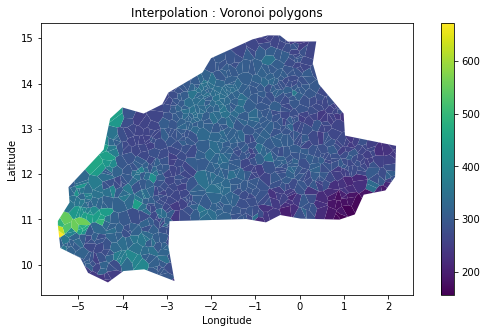

In [5]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(10,5))
vo_clip=gpd.clip(region_df.to_crs(region.crs), region)
vo_clip.plot(column="SRTM30mBur", legend=True, ax=ax)
ax.set(title="Interpolation : Voronoi polygons", xlabel="Longitude", ylabel="Latitude")
plt.show()

In [6]:
from geocube.api.core import make_geocube

In [7]:
from geocube.api.core import make_geocube
cube=make_geocube(vector_data=vo_clip, resolution=(0.02, 0.02) )

In [8]:
cube.SRTM30mBur.rio.to_raster("raster/veronoi.tif")

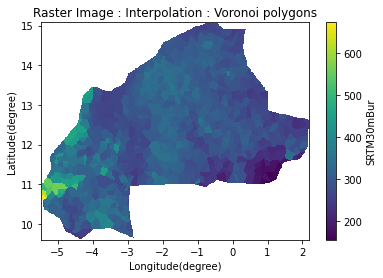

In [9]:
fig, ax=plt.subplots()
cube.SRTM30mBur.plot(ax=ax)
ax.set(title="Raster Image : Interpolation : Voronoi polygons", xlabel="Longitude(degree)", ylabel="Latitude(degree)")
plt.show()

#### We can

### Other interpolation

In [3]:

import geopandas as gpd
import pandas as pd
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import verde as vd
import cartopy
import matplotlib.pyplot as plt
import rioxarray
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
from shapely.geometry import mapping
import json
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import cartopy as cp
import seaborn as sns

## Trend surface

## Spline interpolation

In [32]:
import rioxarray
eleve=eleve.to_crs("epsg:4326")

In [37]:
coordinates = (eleve.geometry.x.values, eleve.geometry.y.values)
spline = vd.Spline().fit(coordinates, eleve.SRTM30mBur)
grid_spline = spline.grid(spacing=0.1, dims=["latitude", "longitude"])
grid_spline=grid_spline.rio.write_crs(region.crs)

In [41]:
spline_cliped=grid_spline.rio.clip(region.geometry.apply(mapping), region.crs)

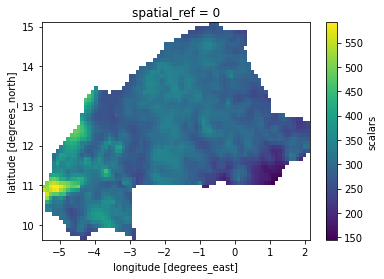

In [43]:
spline_cliped.scalars.plot()

In [44]:
spline_cliped=spline_raster.rio.clip(eleve.geometry.apply(mapping), eleve.crs)

NameError: name 'spline_raster' is not defined

In [5]:
test=rioxarray.open_rasterio('../../SDA_Project_Files/Burkina/bfa_srtm.tif')
src = rasterio.open("../../SDA_Project_Files/Burkina/bfa_srtm.tif")

In [ ]:
from rasterio.plot import show
show(src, transform=src.transform, contour=True)

In [ ]:
show(src.read(1))

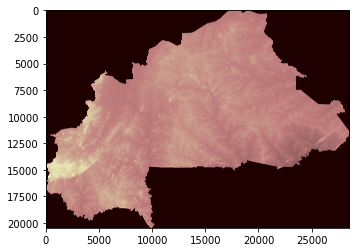

In [1]:
import rasterio
from matplotlib import pyplot
src = rasterio.open("../../SDA_Project_Files/Burkina/bfa_srtm.tif")
pyplot.imshow(src.read(1), cmap='pink')

pyplot.show()


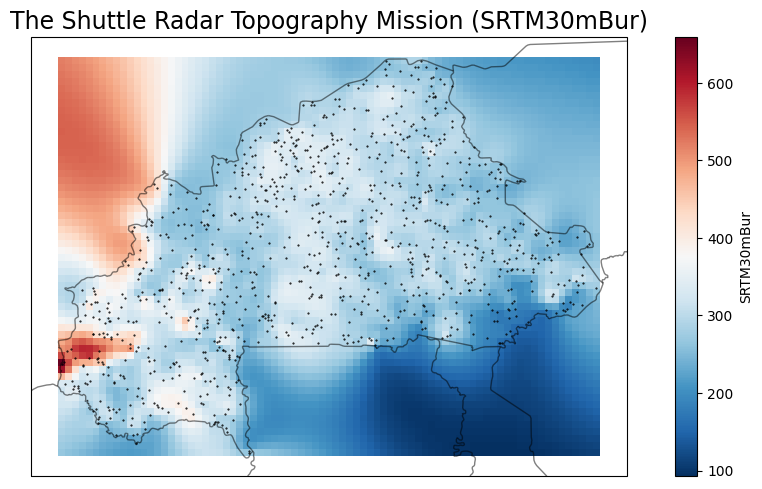

In [14]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_title("The Shuttle Radar Topography Mission (SRTM30mBur)", size=17)
ax.plot(*coordinates, ".k", markersize=1, transform=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle="-", alpha=.5)

tmp = ax.pcolormesh(
    grid_spline.longitude,
    grid_spline.latitude,
    grid_spline.scalars,
    cmap="RdBu_r",
    transform=ccrs.PlateCarree(),
)
plt.colorbar(tmp).set_label("SRTM30mBur")
plt.tight_layout()
plt.savefig("raster/spline", format="svg")
plt.show()

In [15]:
train, test = vd.train_test_split(
    coordinates, eleve.SRTM30mBur, test_size=0.2, random_state=0,
)

spline = vd.Spline().fit(*train)

test_values = np.array(list(test[1]))
prediction = spline.predict(test[0])

df = pd.DataFrame({'obs':test_values[0], 'pred':prediction})

correlation_matrix = np.corrcoef(test_values[0], prediction)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.8646102558339539

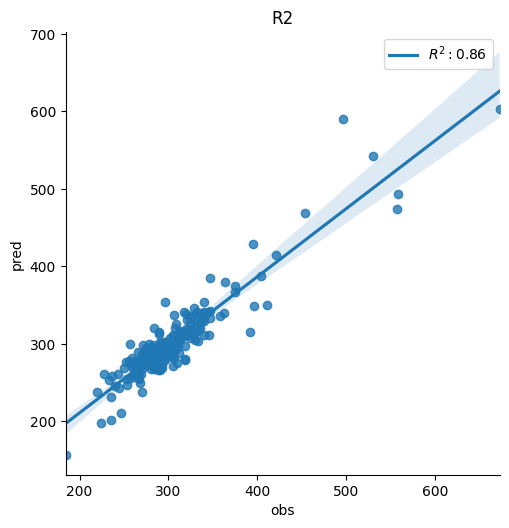

In [16]:
p = sns.lmplot(x='obs',y='pred',data=df,
        line_kws={'label':"Linear Reg"}, legend=True)

ax = p.axes[0, 0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
label_line_2 = r'$R^2:{0:.2f}$'.format(r_squared) 
L_labels[0].set_text(label_line_2)
ax.set_title("R2")
plt.savefig("raster/r2", format="svg")
plt.show()

In [ ]:
rioxarray.open_rasterio("../../SDA_Project_Files/Burkina/bfa_srtm.tif")

In [1]:
raster=rasterio.open("../../SDA_Project_Files/Burkina/bfa_srtm.tif")
show(raster)

NameError: name 'rasterio' is not defined

In [17]:
#spline_raster=spline_raster.rio.set_crs(eleve.crs)

In [18]:
#coords = [json.loads(eleve.to_json())["features"][0]['geometry']]

In [19]:
#spline_cliped=spline_raster.rio.clip(eleve.geometry.apply(mapping), eleve.crs)

In [20]:
#spline_cliped, spline_meta = es.crop_image(spline_raster)

In [ ]:
rio

#### Reference

In [21]:
with rasterio.open("../../SDA_Project_Files/Burkina/bfa_srtm.tif") as src:
    raster = src.read(1)
    width= src.width
    height = src.height
    bands = src.count
    meta = src.meta
    resolution = src.res
    transform=src.transform

In [22]:
resolution

(0.00027777777778167283, 0.00027777777777234506)

In [23]:
spline_df=grid_spline.to_dataframe().reset_index()

In [24]:
spline_gpd=gpd.GeoDataFrame(spline_df, geometry=gpd.points_from_xy(spline_df.longitude, spline_df.latitude))

#### Krigin method

In [25]:
import numpy as np
import pandas as pd
import geopandas as gpd
import glob
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid
import pykrige.kriging_tools as kt
import matplotlib.pyplot as plt

#from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Path, PathPatch
from shapely.ops import cascaded_union

In [26]:

region = gpd.read_file("../../SDA_Project_Files/Burkina/bfa_elevation.shp")
region=region.to_crs("epsg:4326")

In [27]:
boundary = cascaded_union(region.geometry)
xmin, ymin, xmax, ymax = boundary.bounds

In [28]:
xmin = xmin-0.01
xmax = xmax+0.01

ymin = ymin-0.01
ymax = ymax+0.01
# To many lat and lon in the range, max=100
grid_lon = np.linspace(xmin, xmax, 100)
grid_lat = np.linspace(ymin, ymax, 100)

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 6995.844909506465
Full Sill: 7496.107206321732
Range: 7.591835653370439
Nugget: 500.26229681526644 



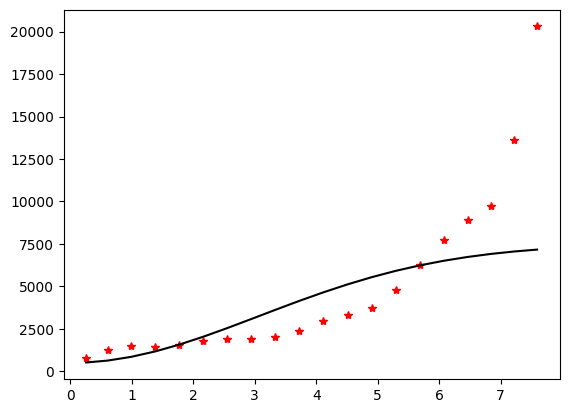

Calculating statistics on variogram model fit...
Q1 = 0.09089535416834933
Q2 = 2.5343269832519777
cR = 1339.770535326923 

Executing Ordinary Kriging...



In [29]:
# OK = OrdinaryKriging(region.geometry.x,region.geometry.y,region.SRTM30mBur, variogram_model='gaussian',verbose=True, enable_plotting=True, enable_statistics=True, nlags=20)
# z1, ss1 = OK.execute('grid', grid_lon, grid_lat)

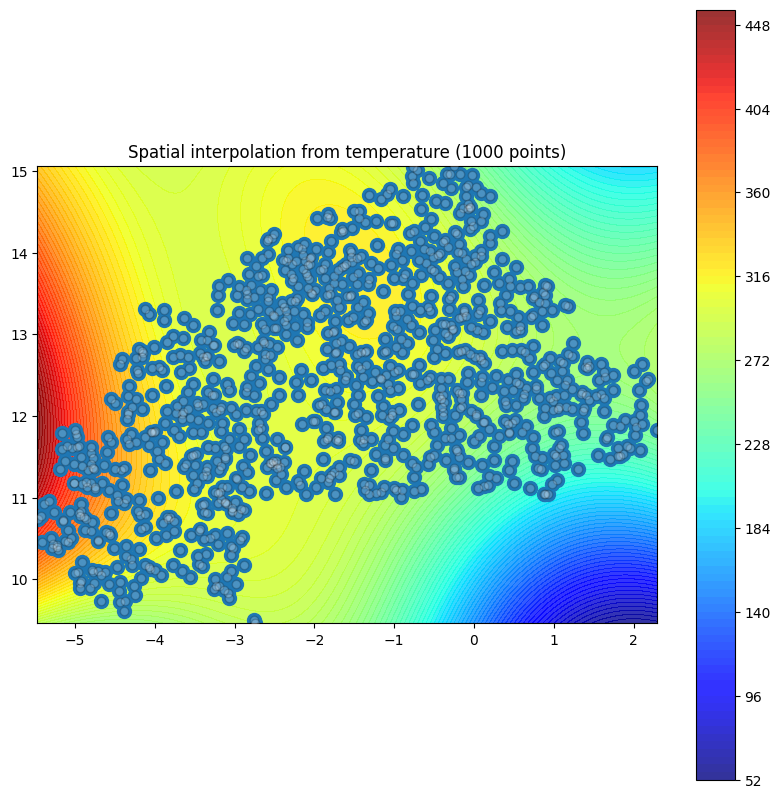

In [30]:
### This function return the value of coordiante
xintrp, yintrp = np.meshgrid(grid_lon, grid_lat) 
fig, ax = plt.subplots(figsize=(10,10))

boundarygeom = region.geometry
contour = plt.contourf(xintrp, yintrp, z1,len(z1),cmap=plt.cm.jet,alpha = 0.8) 
plt.colorbar(contour)


region.plot(ax=ax, color='white', alpha = 0.2, edgecolor='black', zorder = 5)
npts = len(region.geometry.x)

plt.scatter(eleve.geometry.x, eleve.geometry.y,marker='o',s=100)

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.xticks()
plt.yticks()

#Tempreture
plt.title('Spatial interpolation from temperature (%d points)' % npts)
plt.show()

### 2.2

In [2]:
import rasterio
import numpy as np

In [2]:
with rasterio.open("../../SDA_Project_Files/Burkina/bfa_srtm.tif") as src:
    raster = src.read(1)
    width= src.width
    height = src.height
    bands = src.count
    meta = src.meta
    resolution = src.res
    transform=src.transform

In [3]:
with rasterio.open("raster/spline.tif") as src:
    raster2 = src.read(1)
    width2= src.width
    height2 = src.height
    bands2 = src.count
    meta2 = src.meta
    resolution2 = src.res

In [ ]:
import matplotlib.pyplot as plt
from rasterio.plot import show

fig, ax=plt.subplots(figsize=(10,10))
show(test.read(1), transform=test.transform,ax=ax)
plt.show()

In [1]:
test=rasterio.open("../../SDA_Project_Files/Burkina/bfa_srtm.tif")

NameError: name 'rasterio' is not defined

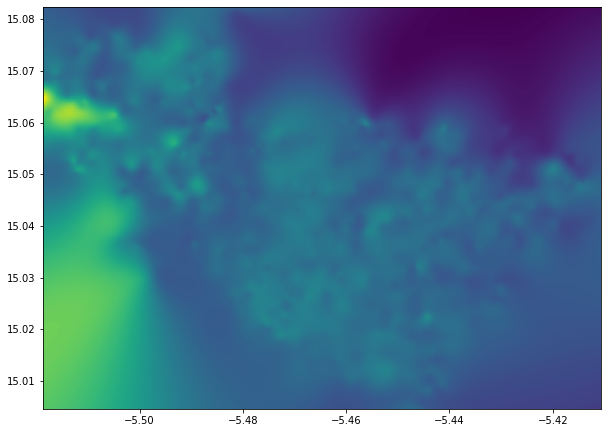

In [25]:
import matplotlib.pyplot as plt
from rasterio.plot import show

fig, ax=plt.subplots(figsize=(10,10))
show(test2.read(1), transform=test.transform,ax=ax)
plt.show()